<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


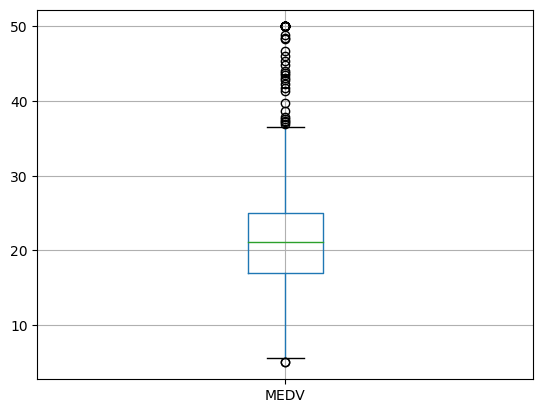

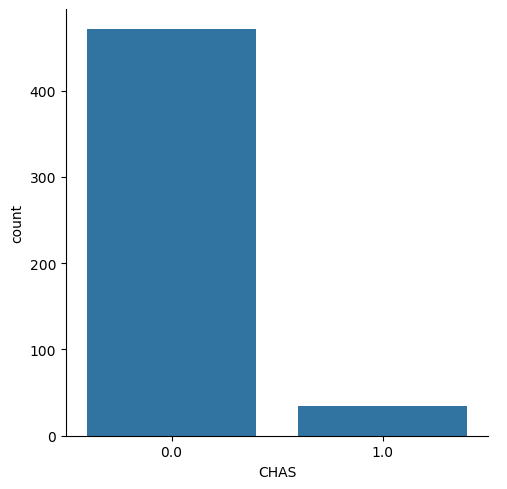

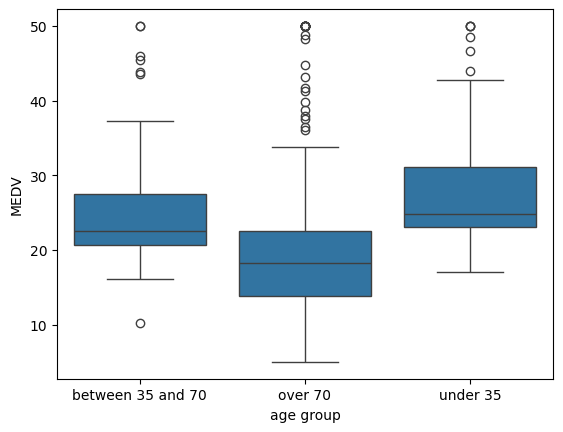

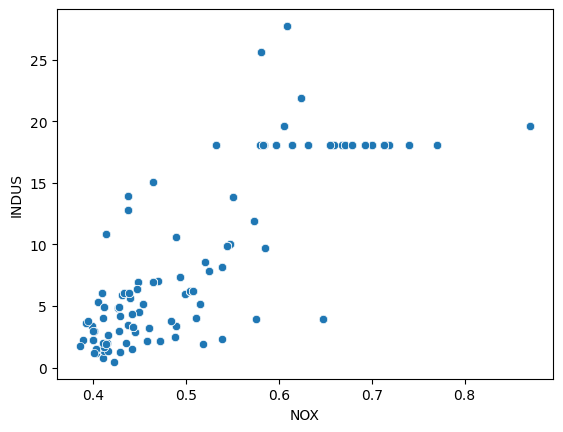

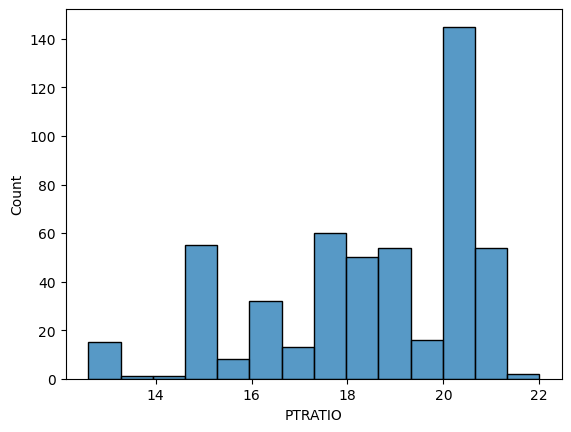

In [14]:
# Median value of owner-occupied homes in boxplot

data = pd.DataFrame(boston_df['MEDV'])

boxplot = data.boxplot()
pyplot.show(boxplot)

# Provide a bar plot for the Charles river variable

distplot = sns.catplot(x='CHAS', kind='count', data = boston_df)
pyplot.show(distplot)

# Provide a boxplot for the MEDV variable vs the AGE variable. 
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

boston_df.loc[boston_df['AGE'] <= 35, 'age group'] = 'under 35'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age group'] = 'between 35 and 70'
boston_df.loc[boston_df['AGE'] >= 70, 'age group'] = 'over 70'

boxplot = sns.boxplot(x = 'age group', y = 'MEDV', data = boston_df)
pyplot.show(boxplot)

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

scatter = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
pyplot.show(scatter)
# we observe a high correlation between the two variables 

# Create a histogram for the pupil-to-teacher ratio variable
hist = sns.histplot(data = boston_df, x = "PTRATIO")
pyplot.show(hist)


In [31]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# H_0: there is no difference

# Levene test to check for variance 
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')
# T-Test
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])
# since the T-test p-value is very small: pvalue=1.4651540072350996e-305 we reject the null hypothesis. There is enough evidence that 
# that the means are statistically significantly different. 


# Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)
# H_0: there is no difference

# Levene test to check for variance 
scipy.stats.levene(boston_df[boston_df['age group'] == 'under 35']['MEDV'], boston_df[boston_df['age group'] =='between 35 and 70']['MEDV'], boston_df[boston_df['age group'] == 'over 70']['MEDV'], center='mean')
# the p-value is: pvalue=0.06295337343259205
# ANOVA Test
low_age = boston_df[boston_df['age group'] == 'under 35']['MEDV']
med_age = boston_df[boston_df['age group'] =='between 35 and 70']['MEDV']
high_age = boston_df[boston_df['age group'] == 'over 70']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(low_age, med_age, high_age)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
# the p-value is: P-Value: 1.7105011022702984e-15, so we reject the null hypothesis. There is enough evidence that the means are 
# statistically different.


# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
# (Pearson Correlation)

# H_0: there is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
# the p-value is pvalue=7.913361061210442e-98, such that we can reject the null hypothesis


# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? 
# (Regression analysis)

# H_0: the weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes
X = boston_df['MEDV'] # independent variable
y = boston_df['DIS'] # dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
# the p-value is small enough, such that we can reject the null hypothesis


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.21e-08
Time:                        12:50:04   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""